# The Spark Foundation GRIP October21

# Task 1: Predict the percentage of a student based on the number of study hours using Supervised Machine Learning


# Author: Munsif Raza


## Importing required libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Reading data in a DataFrame
df = pd.read_csv("Student.txt")

In [4]:
# Preview of our data
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
# Check if dataset is having any null value
df.isnull().value_counts()

Hours  Scores
False  False     25
dtype: int64

## Data Visualization

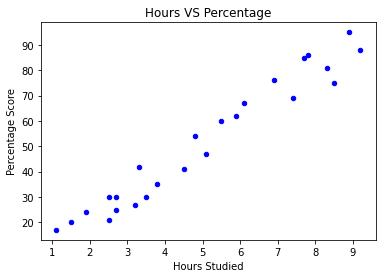

In [13]:
df.plot.scatter(x='Hours', y='Scores', color='blue')
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From above visualization we got to know that there is a direct connection between the hours studied and percentage scored. Hence a Linear Regression model will be a good option to solve this problem.

## Data Preparation for the model

In [14]:
# Depadent Variable
X = df.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
# Independant Variable
y = df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [17]:
# Splitting data in training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Model Training

In [18]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print("Successfully Trained!")

Successfully Trained!


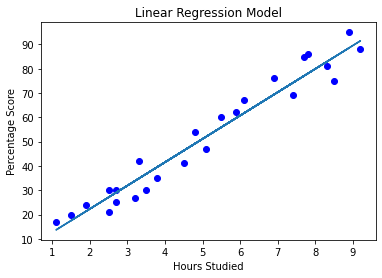

In [20]:
# Visual representation of the trained model
line = linear_reg.coef_*X+linear_reg.intercept_
plt.title("Linear Regression Model")
plt.scatter(X, y, color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(X, line)
plt.show()

# Predictions

In [21]:
# Data prediction using testing data
y_pred = linear_reg.predict(X_test)

In [23]:
# Let's compare actual data and predicted data

data = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,69,74.174939
1,67,61.688457
2,27,33.833997
3,85,77.056435
4,54,49.201975


<AxesSubplot:>

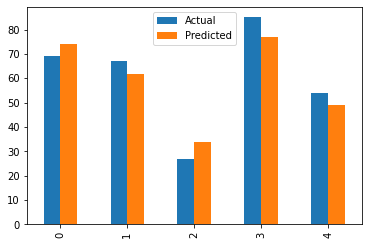

In [24]:
# Visual representation of actual and predicted data
data.plot(kind='bar')

# Model Evaluation

In [26]:
print('Mean Absolute Error Is : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error Is : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error Is : ' , np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error Is :  6.0124137623905725
Mean Squared Error Is :  37.563452579516046
Root Mean Squared Error Is :  2.4520223821145213


In [28]:
print("Slope of Regression Line ",linear_reg.coef_)
print("Y-intercept Of Regression Line",linear_reg.intercept_)

Slope of Regression Line  [9.60498629]
Y-intercept Of Regression Line 3.0980408893375326


# Solving asked Question

In [29]:
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred = linear_reg.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 94.3454106190552
